In [14]:
import pandas as pd
import os
from pydub import AudioSegment
import librosa
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# base_location = '/media/kingdom/DATASET/Extracted/New_Processed/'

# df = pd.read_csv('dataset_detail.csv')

# df['Audio'] = df['Audio'].apply(lambda x: os.path.join(base_location, x))

In [3]:
# df

In [4]:
# Function to get basic audio properties
def get_audio_properties(file_path):
    try:
        audio = AudioSegment.from_file(file_path)
        duration = len(audio) / 1000.0  # duration in seconds
        sample_rate = audio.frame_rate
        channels = audio.channels
        frame_width = audio.frame_width
        return duration, sample_rate, channels, frame_width
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None, None, None, None

In [5]:
# Function to compute loudness
def compute_loudness(file_path):
    try:
        y, sr = librosa.load(file_path, sr=None)
        loudness = librosa.feature.rms(y=y).mean()
        return loudness
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

In [6]:

# Function to detect silence
def detect_silence(file_path, threshold=-50.0, min_silence_len=500):
    try:
        audio = AudioSegment.from_file(file_path)
        silence = AudioSegment.silent(duration=min_silence_len, frame_rate=audio.frame_rate)
        silence_length = sum([len(seg) for seg in audio[::min_silence_len] if seg.dBFS < threshold])
        return silence_length / 1000.0  # silence duration in seconds
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

In [7]:
# Function to extract spectral features
def extract_spectral_features(file_path):
    try:
        y, sr = librosa.load(file_path, sr=None)
        mfccs = librosa.feature.mfcc(y=y, sr=sr)
        return np.mean(mfccs, axis=1)
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

In [8]:

# Base location for audio files
# base_location = '/media/kingdom/DATASET/Extracted/New_Processed/'   # for unprocessed files
base_location = './without_samsad_cv_included'                         # for processed files

# Load the dataset
df = pd.read_csv('dataset_detail_cv_included.csv' )

# Update the 'Audio' column with full file paths
df['Audio'] = df['Audio'].apply(lambda x: os.path.join(base_location, x))


In [9]:
# Initialize columns for insights
df['Duration'] = 0.0
df['Sample Rate'] = 0
df['Channels'] = 0
df['Frame Width'] = 0
df['Loudness'] = 0.0
df['Silence Duration'] = 0.0
df['MFCCs'] = None

In [10]:
df['Audio'].iloc[2738]

'./without_samsad_cv_included/nep_9407_9974252924.wav'

In [11]:
# df['Audio'].iloc[2739:] = df['Audio'].iloc[2739:].apply(lambda x: x.replace('.wav', '.mp3'))

In [12]:
df

,Unnamed: 0,Audio,Transcriptions,Duration,Sample Rate,Channels,Frame Width,Loudness,Silence Duration,MFCCs
0,0,./without_samsad_cv_included/Voice64.wav,इष्टमित्रहरूले भनेका थिए आजकल अङ्ग्रेजी नपढाईक...,0.0,0,0,0,0.0,0.0,None
1,1,./without_samsad_cv_included/Voice65.wav,मलाई कक्षाका साथीहरू निकै मन पराउथे,0.0,0,0,0,0.0,0.0,None
2,2,./without_samsad_cv_included/Voice66.wav,तिहारको पहिलो दिनलाई कागतिहार भनिन्छ,0.0,0,0,0,0.0,0.0,None
3,3,./without_samsad_cv_included/Voice67.wav,छोरोले जब म्याट्रिकमा प्रथम श्रेणी ल्यायो बाको...,0.0,0,0,0,0.0,0.0,None
4,4,./without_samsad_cv_included/Voice68.wav,मनिस सम्पत्तिघरबंगलाका लागि आफ्नो छिमेकीघरपरिव...,0.0,0,0,0,0.0,0.0,None
...,...,...,...,...,...,...,...,...,...,...
3506,3506,./without_samsad_cv_included/common_voice_ne-N...,आनन्द आयो नुहाए पछि,0.0,0,0,0,0.0,0.0,None
3507,3507,./without_samsad_cv_included/common_voice_ne-N...,जाअौँ डुङ्गा बगाउन,0.0,0,0,0,0.0,0.0,None
3508,3508,./without_samsad_cv_included/common_voice_ne-N...,वानेश्वरमा पनि पानी पर्न थाल्यो अब,0.0,0,0,0,0.0,0.0,None
3509,3509,./without_samsad_cv_included/common_voice_ne-N...,नेपालमा अझै पनि भुकम्पको झट्का अाइरन्छ,0.0,0,0,0,0.0,0.0,None


In [13]:
# Apply functions to extract insights
for index, row in df.iterrows():
    file_path = row['Audio']
    duration, sample_rate, channels, frame_width = get_audio_properties(file_path)
    loudness = compute_loudness(file_path)
    silence_duration = detect_silence(file_path)
    mfccs = extract_spectral_features(file_path)
    
    df.at[index, 'Duration'] = duration
    df.at[index, 'Sample Rate'] = sample_rate
    df.at[index, 'Channels'] = channels
    df.at[index, 'Frame Width'] = frame_width
    df.at[index, 'Loudness'] = loudness
    df.at[index, 'Silence Duration'] = silence_duration
    df.at[index, 'MFCCs'] = mfccs




In [14]:
# Save the updated DataFrame to a new CSV file
df.to_csv('dataset_insights_after_preprocess.csv', index=False)

In [23]:
df = pd.read_csv('dataset_insights_before_preprocess.csv')

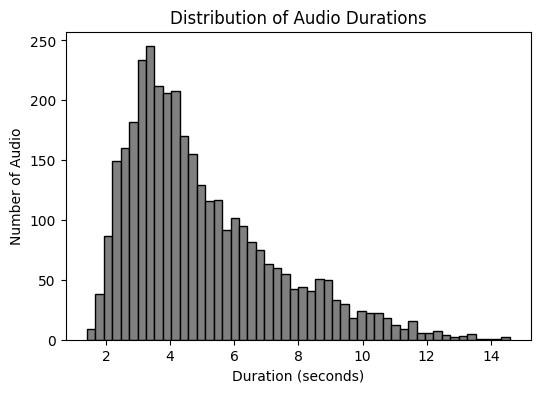

In [24]:
# Draw graphs to generalize findings
# Duration Distribution
plt.figure(figsize=(6, 4))
plt.hist(df['Duration'].dropna(), bins=50, color='grey', edgecolor='black')
plt.title('Distribution of Audio Durations')
plt.xlabel('Duration (seconds)')
plt.ylabel('Number of Audio')
plt.savefig('Audio Durations.png')
plt.show()



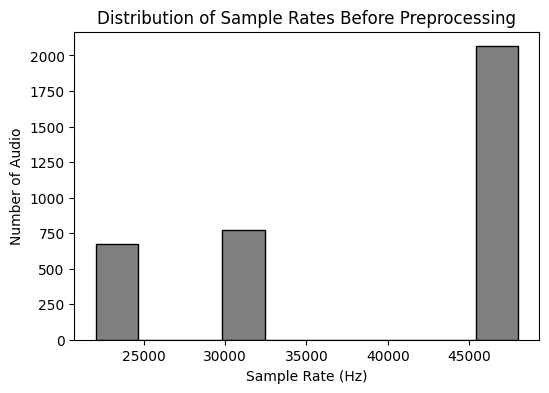

In [25]:
# 
import matplotlib.pyplot as plt

df2 = pd.read_csv('dataset_insights_after_preprocess.csv')

# Sample data (replace with your actual data)
x = 16000 # Assuming a single sample rate
y = 3511  # Assuming a single count for that sample rate

# No need to convert normalized values as you have raw data

# Plotting the histogram with wider figure
plt.figure(figsize=(6, 4))  # Adjust figure size as needed
# plt.hist(x, y, color='grey', edgecolor='black', align='mid', rwidth=5)
plt.hist(df['Sample Rate'].dropna(),color='grey', edgecolor='black', align='mid', rwidth=5)
plt.title('Distribution of Sample Rates Before Preprocessing')
plt.xlabel('Sample Rate (Hz)')
plt.ylabel('Number of Audio')

# No need to adjust x-axis labels as data is not normalized

plt.savefig('Sample Durations.png')
plt.show()


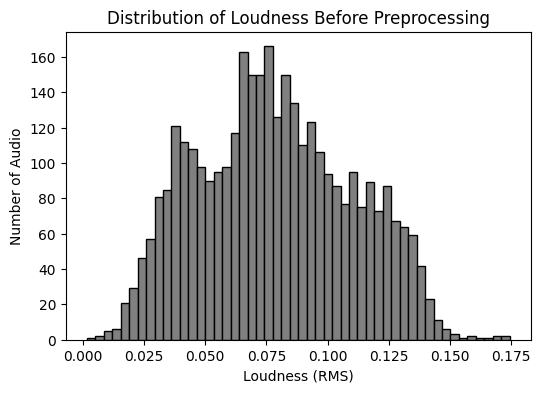

In [26]:
# Loudness Distribution
plt.figure(figsize=(6, 4))
plt.hist(df['Loudness'].dropna(), bins=50, color='grey', edgecolor='black')
plt.title('Distribution of Loudness Before Preprocessing')
plt.xlabel('Loudness (RMS)')
plt.ylabel('Number of Audio')
plt.savefig('Loudness Durations.png')
plt.show()

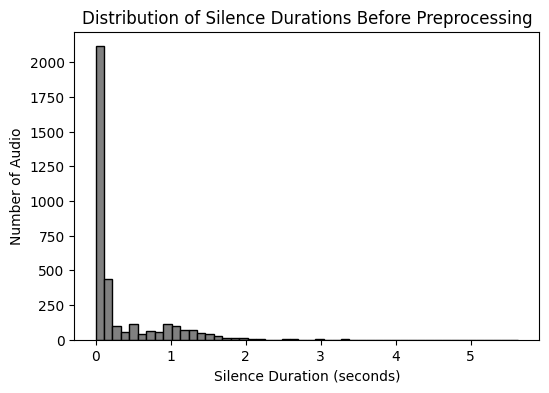

In [27]:
# Silence Duration Distribution
plt.figure(figsize=(6, 4))
plt.hist(df['Silence Duration'].dropna(), bins=50, color='grey', edgecolor='black')
plt.title('Distribution of Silence Durations Before Preprocessing')
plt.xlabel('Silence Duration (seconds)')
plt.ylabel('Number of Audio')
plt.savefig('Silence Durations.png')
plt.show()


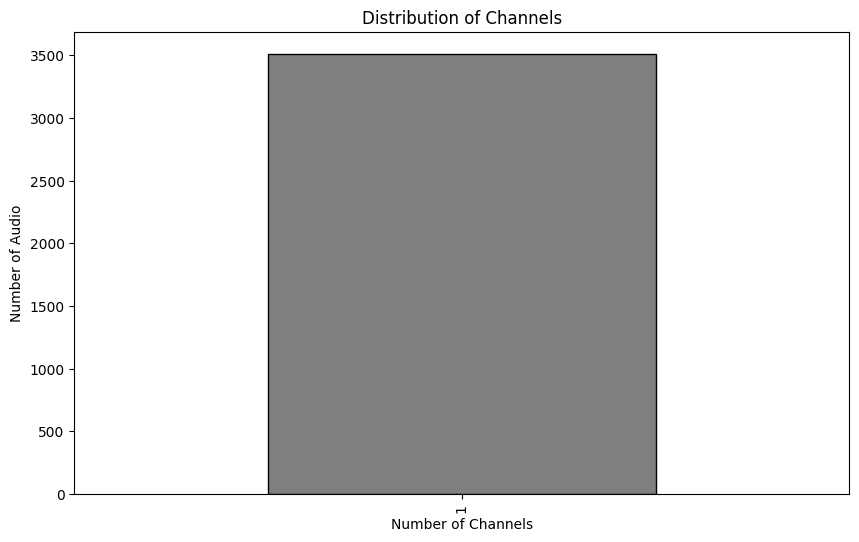

In [20]:
plt.figure(figsize=(10, 6))
df['Channels'].value_counts().plot(kind='bar', color='grey', edgecolor='black')
plt.title('Distribution of Channels')
plt.xlabel('Number of Channels')
plt.ylabel('Number of Audio')
plt.savefig('channels.png')
plt.show()


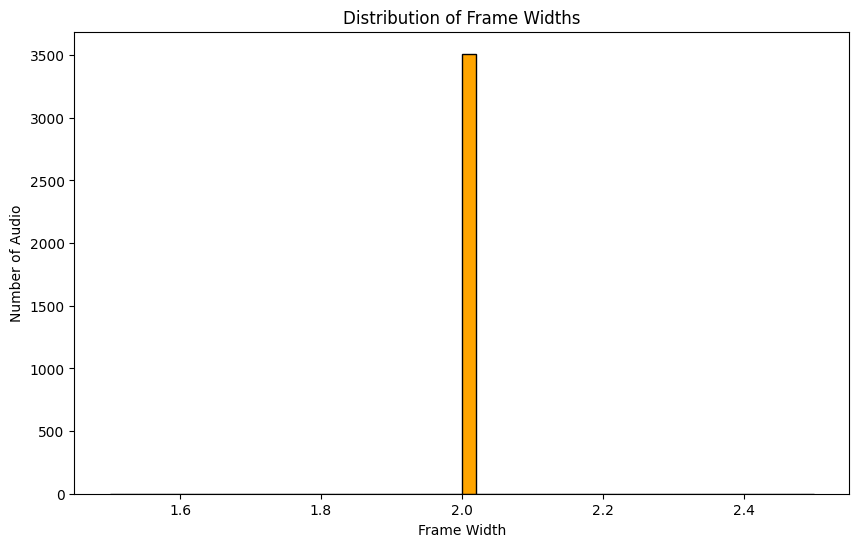

In [21]:
plt.figure(figsize=(10, 6))
plt.hist(df['Frame Width'].dropna(), bins=50, color='orange', edgecolor='black')
plt.title('Distribution of Frame Widths')
plt.xlabel('Frame Width')
plt.ylabel('Number of Audio')
plt.savefig('frame_width_before_preprocessing.png')
plt.show()


In [ ]:
# # Calculate the mean of MFCCs for each file and plot the distribution of these means
# mfcc_means = df['MFCCs'].dropna().apply(lambda x: np.mean(eval(x))) 
# plt.figure(figsize=(10, 6))
# plt.hist(mfcc_means, bins=50, color='magenta', edgecolor='black')
# plt.title('Distribution of Mean MFCC Values')
# plt.xlabel('Mean MFCC Value')
# plt.ylabel('Frequency')
# plt.show()


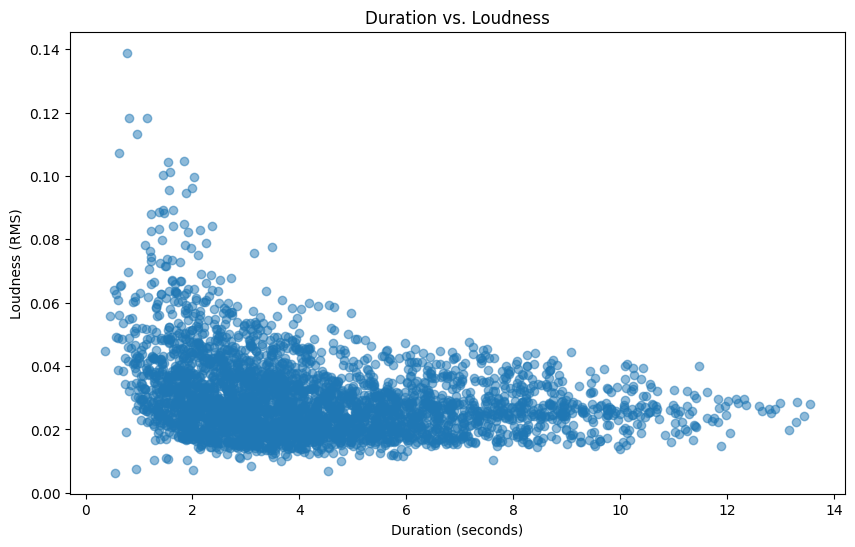

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Duration'], df['Loudness'], alpha=0.5)
plt.title('Duration vs. Loudness')
plt.xlabel('Duration (seconds)')
plt.ylabel('Loudness (RMS)')
plt.show()
